In [1]:
# Import our dependencies
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

In [2]:
# Create Dataframe for war dataset
url = 'https://raw.githubusercontent.com/brianrwheatley/final-baseball-war-stats/main/Resources/jeffbagwell_war_historical.csv'
war_df = pd.read_csv(url, encoding='latin-1')
war_df.head()


,player_name,age,key_bbref,year_ID,team_ID,stint_ID,lg_ID,is_P,franch_ID,sched,...,gms_RF,gms_OF,gms_DH,gms_PH,gms_PR,prev_tm,arrived,departed,next_tm,salary
0,David Aardsma,22.0,aardsda01,2004,SFG,1,NL,Y,SFG,162,...,0.0,0.0,0.0,0.0,0.0,---,2004,2004,CHC,300000.0
1,David Aardsma,24.0,aardsda01,2006,CHC,1,NL,Y,CHC,162,...,0.0,0.0,0.0,0.0,0.0,SFG,2006,2006,CHW,NaN
2,David Aardsma,25.0,aardsda01,2007,CHW,1,AL,Y,CHW,162,...,0.0,0.0,0.0,0.0,0.0,CHC,2007,2007,BOS,387500.0
3,David Aardsma,26.0,aardsda01,2008,BOS,1,AL,Y,BOS,162,...,0.0,0.0,0.0,0.0,0.0,CHW,2008,2008,SEA,403250.0
4,David Aardsma,27.0,aardsda01,2009,SEA,1,AL,Y,SEA,162,...,0.0,0.0,0.0,0.0,0.0,BOS,2009,2010,NYY,419000.0


In [3]:
# Create seperate Dataframe for injury dataset
url2 = 'https://raw.githubusercontent.com/brianrwheatley/final-baseball-war-stats/main/Resources/cleaned_injury_data.csv'
injury_df = pd.read_csv(url2, encoding='latin-1')
injury_df.head()

,Unnamed: 0,Name,Date,Notes,Team
0,1,Jeff Suppan,2010-03-30,placed on 15-day DL with cervical disc pain,Brewers
1,2,Josh Butler,2010-03-30,placed on 15-day DL with right elbow impingement,Brewers
2,3,Alberto Arias,2010-03-31,placed on 15-day DL with rotator cuff injury,Astros
3,4,Lance Berkman,2010-03-31,placed on 15-day DL with left knee injury (sur...,Astros
4,5,Yorman Bazardo,2010-03-31,placed on 15-day DL with strained right shoulder,Astros


In [4]:
# Filter Dataframe to years in question >=2018
war_df=war_df[war_df.year_ID >=2018]
war_df

,player_name,age,key_bbref,year_ID,team_ID,stint_ID,lg_ID,is_P,franch_ID,sched,...,gms_RF,gms_OF,gms_DH,gms_PH,gms_PR,prev_tm,arrived,departed,next_tm,salary
64,Fernando Abad,33.0,abadfe01,2019,SFG,1,NL,Y,SFG,162,...,0.0,0.0,0.0,0.0,0.0,BOS,2019,2019,BAL,100000.0
65,Fernando Abad,35.0,abadfe01,2021,BAL,1,AL,Y,BAL,162,...,0.0,0.0,0.0,0.0,0.0,SFG,2021,2021,---,NaN
74,Cory Abbott,25.0,abbotco01,2021,CHC,1,NL,Y,CHC,162,...,0.0,0.0,0.0,1.0,0.0,---,2021,2021,---,NaN
198,C.J. Abrams,21.0,abramcj01,2022,SDP,1,NL,N,SDP,29,...,3.0,3.0,1.0,2.0,0.0,---,2022,2022,---,NaN
201,Albert Abreu,24.0,abreual01,2020,NYY,1,AL,Y,NYY,60,...,0.0,0.0,0.0,0.0,0.0,---,2020,2021,TEX,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111973,Mike Zunino,27.0,zuninmi01,2018,SEA,1,AL,N,SEA,162,...,0.0,0.0,1.0,7.0,0.0,---,2013,2018,TBD,2975000.0
111974,Mike Zunino,28.0,zuninmi01,2019,TBR,1,AL,N,TBD,162,...,0.0,0.0,0.0,3.0,0.0,SEA,2019,2022,---,4412000.0
111975,Mike Zunino,29.0,zuninmi01,2020,TBR,1,AL,N,TBD,60,...,0.0,0.0,0.0,0.0,0.0,SEA,2019,2022,---,4500000.0
111976,Mike Zunino,30.0,zuninmi01,2021,TBR,1,AL,N,TBD,162,...,0.0,0.0,0.0,5.0,0.0,SEA,2019,2022,---,2000000.0


In [5]:
# Remove activated notes from dataset
injury_df = injury_df[injury_df["Notes"].str.contains("activated" ) == False]
injury_df.head()

,Unnamed: 0,Name,Date,Notes,Team
0,1,Jeff Suppan,2010-03-30,placed on 15-day DL with cervical disc pain,Brewers
1,2,Josh Butler,2010-03-30,placed on 15-day DL with right elbow impingement,Brewers
2,3,Alberto Arias,2010-03-31,placed on 15-day DL with rotator cuff injury,Astros
3,4,Lance Berkman,2010-03-31,placed on 15-day DL with left knee injury (sur...,Astros
4,5,Yorman Bazardo,2010-03-31,placed on 15-day DL with strained right shoulder,Astros


In [6]:
# Quick Merge of dataframes to test in machine learning.  Removing Name from injury database that is merged
injury_war_df = pd.merge(war_df, injury_df, left_on='player_name', right_on='Name')
injury_war_df = injury_war_df.drop("Name", 1)
injury_war_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,player_name,age,key_bbref,year_ID,team_ID,stint_ID,lg_ID,is_P,franch_ID,sched,...,gms_PR,prev_tm,arrived,departed,next_tm,salary,Unnamed: 0,Date,Notes,Team
0,Fernando Abad,33.0,abadfe01,2019,SFG,1,NL,Y,SFG,162,...,0.0,BOS,2019,2019,BAL,100000.0,1683,2011-07-05,placed on 15-day DL with left shoulder tendinitis,Astros
1,Fernando Abad,33.0,abadfe01,2019,SFG,1,NL,Y,SFG,162,...,0.0,BOS,2019,2019,BAL,100000.0,2602,2012-05-27,placed on 15-day DL with strained right interc...,Astros
2,Fernando Abad,35.0,abadfe01,2021,BAL,1,AL,Y,BAL,162,...,0.0,SFG,2021,2021,---,NaN,1683,2011-07-05,placed on 15-day DL with left shoulder tendinitis,Astros
3,Fernando Abad,35.0,abadfe01,2021,BAL,1,AL,Y,BAL,162,...,0.0,SFG,2021,2021,---,NaN,2602,2012-05-27,placed on 15-day DL with strained right interc...,Astros
4,Bryan Abreu,22.0,abreubr01,2019,HOU,1,AL,Y,HOU,162,...,0.0,---,2019,2022,---,NaN,14697,2020-09-29,placed on 60-day IL,Astros


In [7]:
# Use dtypes to check column values
injury_war_df.dtypes

player_name     object
age            float64
key_bbref       object
year_ID          int64
team_ID         object
                ...   
salary         float64
Unnamed: 0       int64
Date            object
Notes           object
Team            object
Length: 82, dtype: object

In [8]:
# Drop the non-beneficial ID columns, "player_name", "key_bbref", "franch_ID", "prev_tm", "next_tm", "Unamed: 0"  .
injury_war_df = injury_war_df.drop(columns=["player_name", "key_bbref", "franch_ID", "prev_tm", "next_tm", "Unnamed: 0"])
injury_war_df.head()

,age,year_ID,team_ID,stint_ID,lg_ID,is_P,sched,g_bat,pa,bat162,...,gms_OF,gms_DH,gms_PH,gms_PR,arrived,departed,salary,Date,Notes,Team
0,33.0,2019,SFG,1,NL,Y,162,18,0,0.0,...,0.0,0.0,0.0,0.0,2019,2019,100000.0,2011-07-05,placed on 15-day DL with left shoulder tendinitis,Astros
1,33.0,2019,SFG,1,NL,Y,162,18,0,0.0,...,0.0,0.0,0.0,0.0,2019,2019,100000.0,2012-05-27,placed on 15-day DL with strained right interc...,Astros
2,35.0,2021,BAL,1,AL,Y,162,2,0,0.0,...,0.0,0.0,0.0,0.0,2021,2021,NaN,2011-07-05,placed on 15-day DL with left shoulder tendinitis,Astros
3,35.0,2021,BAL,1,AL,Y,162,2,0,0.0,...,0.0,0.0,0.0,0.0,2021,2021,NaN,2012-05-27,placed on 15-day DL with strained right interc...,Astros
4,22.0,2019,HOU,1,AL,Y,162,0,0,0.0,...,0.0,0.0,0.0,0.0,2019,2022,NaN,2020-09-29,placed on 60-day IL,Astros


In [9]:
# Generate our categorical variable list
war_cat = injury_war_df.dtypes[injury_war_df.dtypes == "object"].index.tolist()
war_cat

['team_ID', 'lg_ID', 'is_P', 'Date', 'Notes', 'Team']

In [10]:
# Check the number of unique values in each column
injury_war_df[war_cat].nunique()

team_ID      30
lg_ID         2
is_P          2
Date       1625
Notes      2383
Team         30
dtype: int64

In [12]:
# Look at notes value counts for binning

counts = injury_war_df.Notes.value_counts()
counts.to_csv('injury_type.csv')
counts

placed on 10-day IL with strained left hamstring            324
placed on 10-day IL with strained right hamstring           284
placed on 10-day IL with COVID-19 coronavirus               260
placed on 10-day IL with COVID-19 positive test             257
placed on 7-day DL with concussion                          226
                                                           ... 
transferred to 60-day DL with sore lower back                 1
placed on 10-day DL with strained lat muscle                  1
transferred to 60-day DL with strained lat muscle             1
transferred to 60-day DL with fractured right collarbone      1
placed on 15-day DL with stiffness in right hip               1
Name: Notes, Length: 2383, dtype: int64

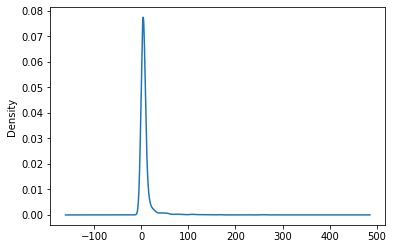

In [13]:
# Visualize the value counts of Notes
counts.plot.density()

In [14]:
# Determine which values to replace if counts are less than ...?
replace_notes = list(counts[counts <10].index)

# Replace in dataframe
for injury in replace_notes:
    injury_war_df.Notes = injury_war_df.Notes.replace(injury,"Other")
    
# Check to make sure binning was successful
injury_war_df.Notes.value_counts()

Other                                                                   8308
placed on 10-day IL with strained left hamstring                         324
placed on 10-day IL with strained right hamstring                        284
placed on 10-day IL with COVID-19 coronavirus                            260
placed on 10-day IL with COVID-19 positive test                          257
                                                                        ... 
placed on 15-day DL with strained left elbow                              10
placed on 10-day DL with sprained right wrist                             10
placed on 10-day IL with sprained left hand                               10
placed on 10-day DL with rotator cuff inflammation in right shoulder      10
placed on 10-day IL with strained intercostal                             10
Name: Notes, Length: 395, dtype: int64